In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = f'{os.getcwd()}/names/'

In [3]:
def func(conc):
    def wrapper(*args):
        data = dict()
        for year in args:
            an = os.path.join(DATA_PATH, 'yob{}.txt'.format(year))
            data[year] = pd.read_csv(an, names=['Name', 'Gender', 'Count'])
        return conc(pd.concat(data, names=['Year', 'Pos']))
    return wrapper

In [4]:
# 1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
@func
def dynamics(names):
    return names.query('Name == ["Ruth", "Robert"]').groupby(['Name', 'Year'])['Count'].sum().unstack('Name')

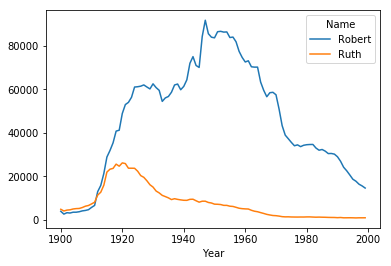

In [5]:
dynamics(*range(1900, 2000, 1)).plot()

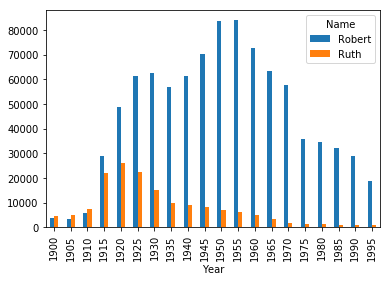

In [6]:
# 2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
dynamics(*range(1900, 2000, 5)).plot.bar()

In [7]:
# 3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
@func
def top10(names):
    data = names.groupby(['Name'])['Name', 'Count'].sum().reset_index()
    return data.loc[data['Name'].str.startswith('R')].sort_values("Count", ascending=False).head(10)

([<matplotlib.patches.Wedge at 0x2c4a91afa20>,
 [Text(0.425862,1.01422,'Robert'),
  Text(-1.09755,0.0733648,'Richard'),
  Text(-0.529495,-0.964176,'Ronald'),
  Text(0.0848116,-1.09673,'Roger'),
  Text(0.432815,-1.01127,'Raymond'),
  Text(0.70838,-0.841545,'Rebecca'),
  Text(0.887078,-0.650455,'Ruth'),
  Text(0.992756,-0.473747,'Roy'),
  Text(1.06117,-0.289675,'Ralph'),
  Text(1.09569,-0.0973355,'Rita')])

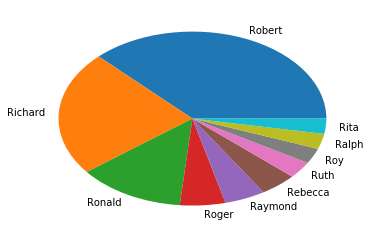

In [8]:
top10_r = top10(1950, 1951)
plt.pie(top10_r['Count'], labels=top10_r['Name'])

In [13]:
# 4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет.
@func
def consonants(names):
    data = names.groupby(['Name'])['Count'].sum().reset_index()
    data['Len'] = data.apply(lambda row: sum(1 for x in row['Name'].lower() if x not in 'aeiouy'), axis=1)
    return data

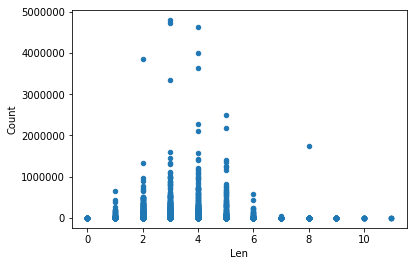

In [14]:
consonants(*range(1900, 2000, 1)).plot.scatter(x='Len', y='Count')